<a href="https://colab.research.google.com/github/JHaddyJ/ML/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Project A: Different Varieties of Wheat

* We will build a decision tree based classifier that will classify the wheat variety using the dtatset: seeds_dataset.txt.

In [ ]:
#Load the Dataset
file_path = '/content/drive/MyDrive/CSC340/seeds_dataset.txt'
wheat = pd.read_csv(file_path, delimiter = '\t')

**Exploratory Data Analysis**

* We will begin to learn about the dataset we are working with.

* We will take a look at the dimensions so we can know the size.

In [ ]:
#Dimensions of the Dataset
wheat.shape

(209, 8)

* There are 209 rows and 8 columns in the dataset.

In [ ]:
#view the first 10 rows of the Dataset
wheat.head(10)

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
5,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
6,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
7,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
8,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1
9,15.26,14.85,0.8696,5.714,3.242,4.543,5.314,1


* Dataset Background Information: Seven geometric parameters of wheat kernels were measured.

* From the view of the data above, we can see that there are no column labels available in the dataset and the data values themselves are being used as the column labels.

> * We will do an online search on the dataset to learn about the missing columns labels, because from the bacground information, we can see that each column represents a specific geometric parameter of the kernels.

> * We will reload the dataset specifying the column labels for a better dataframe for the EDA.

> * From the internet search, the colum names are 'Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',  'Assymmetry.Coeff', 'Kernel.Groove', 'Variety' so, we will update the dataset accordingly.

In [ ]:
#Reload the Dataset with specific column labels
columns = ['Area','Perimeter','Compactness', 'Kernel.Length','Kernel.Width', 'Assymmetry.Coeff','Kernel.Groove','Variety']

file_path = '/content/drive/MyDrive/CSC340/seeds_dataset.txt'
wheat = pd.read_csv(file_path, sep= '\t', header = None, names = columns)

In [ ]:
#view the first 10 rows of the Dataset
wheat.head(10)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Assymmetry.Coeff,Kernel.Groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


* With the updated column labels, the different kernel dimensions are now specified and we can correctly identify which column represents which geometric measurement of the kernel.
* The target attribute or class attribute is 'Variety'.

In [ ]:
#Dimensions of the Dataset
wheat.shape

(210, 8)

* We have an additional column in the dataset from the addition of the column labels.

In [ ]:
#Data types per attribute
wheat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              210 non-null    float64
 1   Perimeter         210 non-null    float64
 2   Compactness       210 non-null    float64
 3   Kernel.Length     210 non-null    float64
 4   Kernel.Width      210 non-null    float64
 5   Assymmetry.Coeff  210 non-null    float64
 6   Kernel.Groove     210 non-null    float64
 7   Variety           210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


* The dataset is full populated: there are no null or missing values in the
dataset.
* The target attribute is of type integer and the kernel dimensions
attribute are of float types.

* Since the target attribute is of type integer/numerical; we will take a look at the different varieties of wheat in the dataset to know the count of wheat classes in the dataset.

In [ ]:
#Check the existing different varities of wheat in the dataset
wheat['Variety'].unique()

array([1, 2, 3])

* Background Information: The dataset comprises of 3 different varieties of wheat: Kama, Rosa, Canadian.

> * The 'Variety' values are three: 1,2,3. Each of the 210 kernels match with one of the 3 whaat varieties.

> * We will convert the variety number with their specific wheat type.

In [ ]:
#Change 'Variety' values from numerical to categorical.
wheat["Variety"].replace({1 :"Kama" , 2 :"Rosa" , 3 :"Canadian"} , inplace = True)
wheat.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Assymmetry.Coeff,Kernel.Groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


* The classes are updated to represent the defined wheat variety.

In [ ]:
#Summay statistics of Wheat Dataset
wheat.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Assymmetry.Coeff,Kernel.Groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


* 'Area' and 'Perimeter' measurements have close mean values as well as 'Kernel.Length' and 'Kernel.Groove'.
* The statistics of the dataset are providing much information about the data that would be necessary in the building of the decision tree.
* "Compactness' values are all less than one and are between 0.808 and 0.918.

* It will be helpful to check the presence of outliers in the dataset.

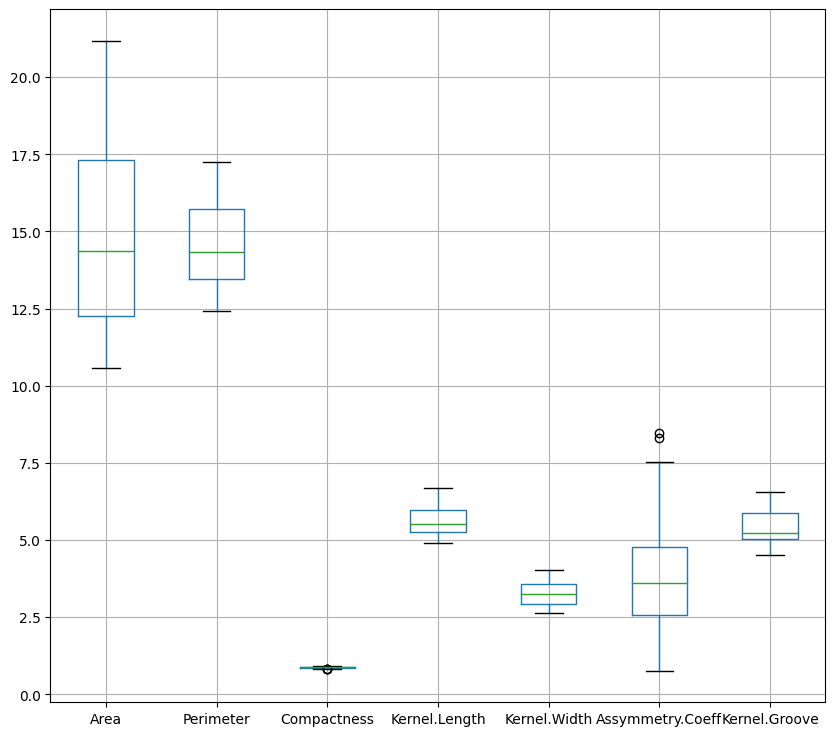

In [ ]:
#Boxplot of Wheat dataset
wheat.boxplot(figsize=(10,9));

* 'Assymmetry.Coeff' has visible outliers in the upper quartile range and 'Compactness' has an outlier in the lower quartile range.
* 'Compactness' has values very close together, as indicated by the statistics above.
* All the other attributes have no existing outliers.

* We will now check the presence of correlation between the features and the existence of correlation between the classes and the features.
* This is important since we are performing classification and the correlation will be helpful in determining how well the features contibute to the classes.

<ipython-input-38-00a0296511ec>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = wheat.corr()


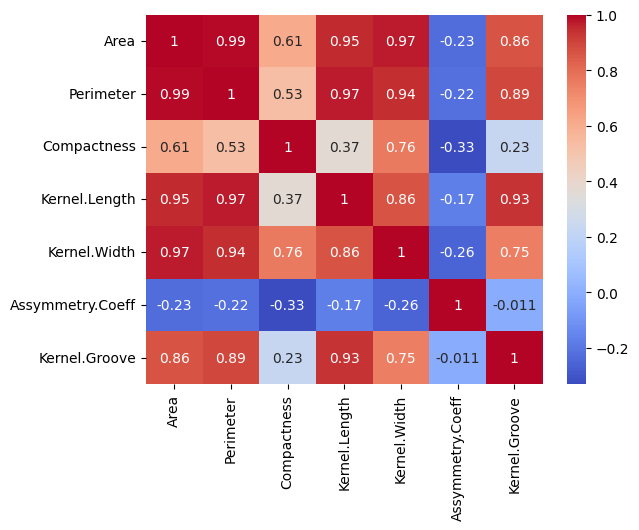

In [ ]:
import seaborn as sns

#correlation plot
corr_matrix = wheat.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

With the 7 geometric parameters of the kernels

> 'Area' has a positivie correlation with 'Perimeter', 'Kernel.length', 'kernel.width', and 'kernel.Groove'.

> 'Perimeter' has a positive correlation with 'kernel.Groove', 'kernel.width', 'Kernel.length', and 'Area'

> 'Compactness has a slight positive correlation with 'Kernel.width'

> 'Kernel.length' has a postive correlation with 'kernel.Groove', 'kernel.width', 'Perimeter' and 'Area'

> 'Kernel.Width' has a positive correlation with 'kernel.Groove', 'Kernel.length', 'Compactness', 'Perimeter', and 'Area'.

> 'Kernel.Groove' has a positive correlation with 'kernel.width', 'kernel.length', 'Perimeter' and 'Area'.

> The "Assymetric.Coeff" feature has no correlation with any of the other features.

> 'Compactness' has some correlation with the features but not so strong.

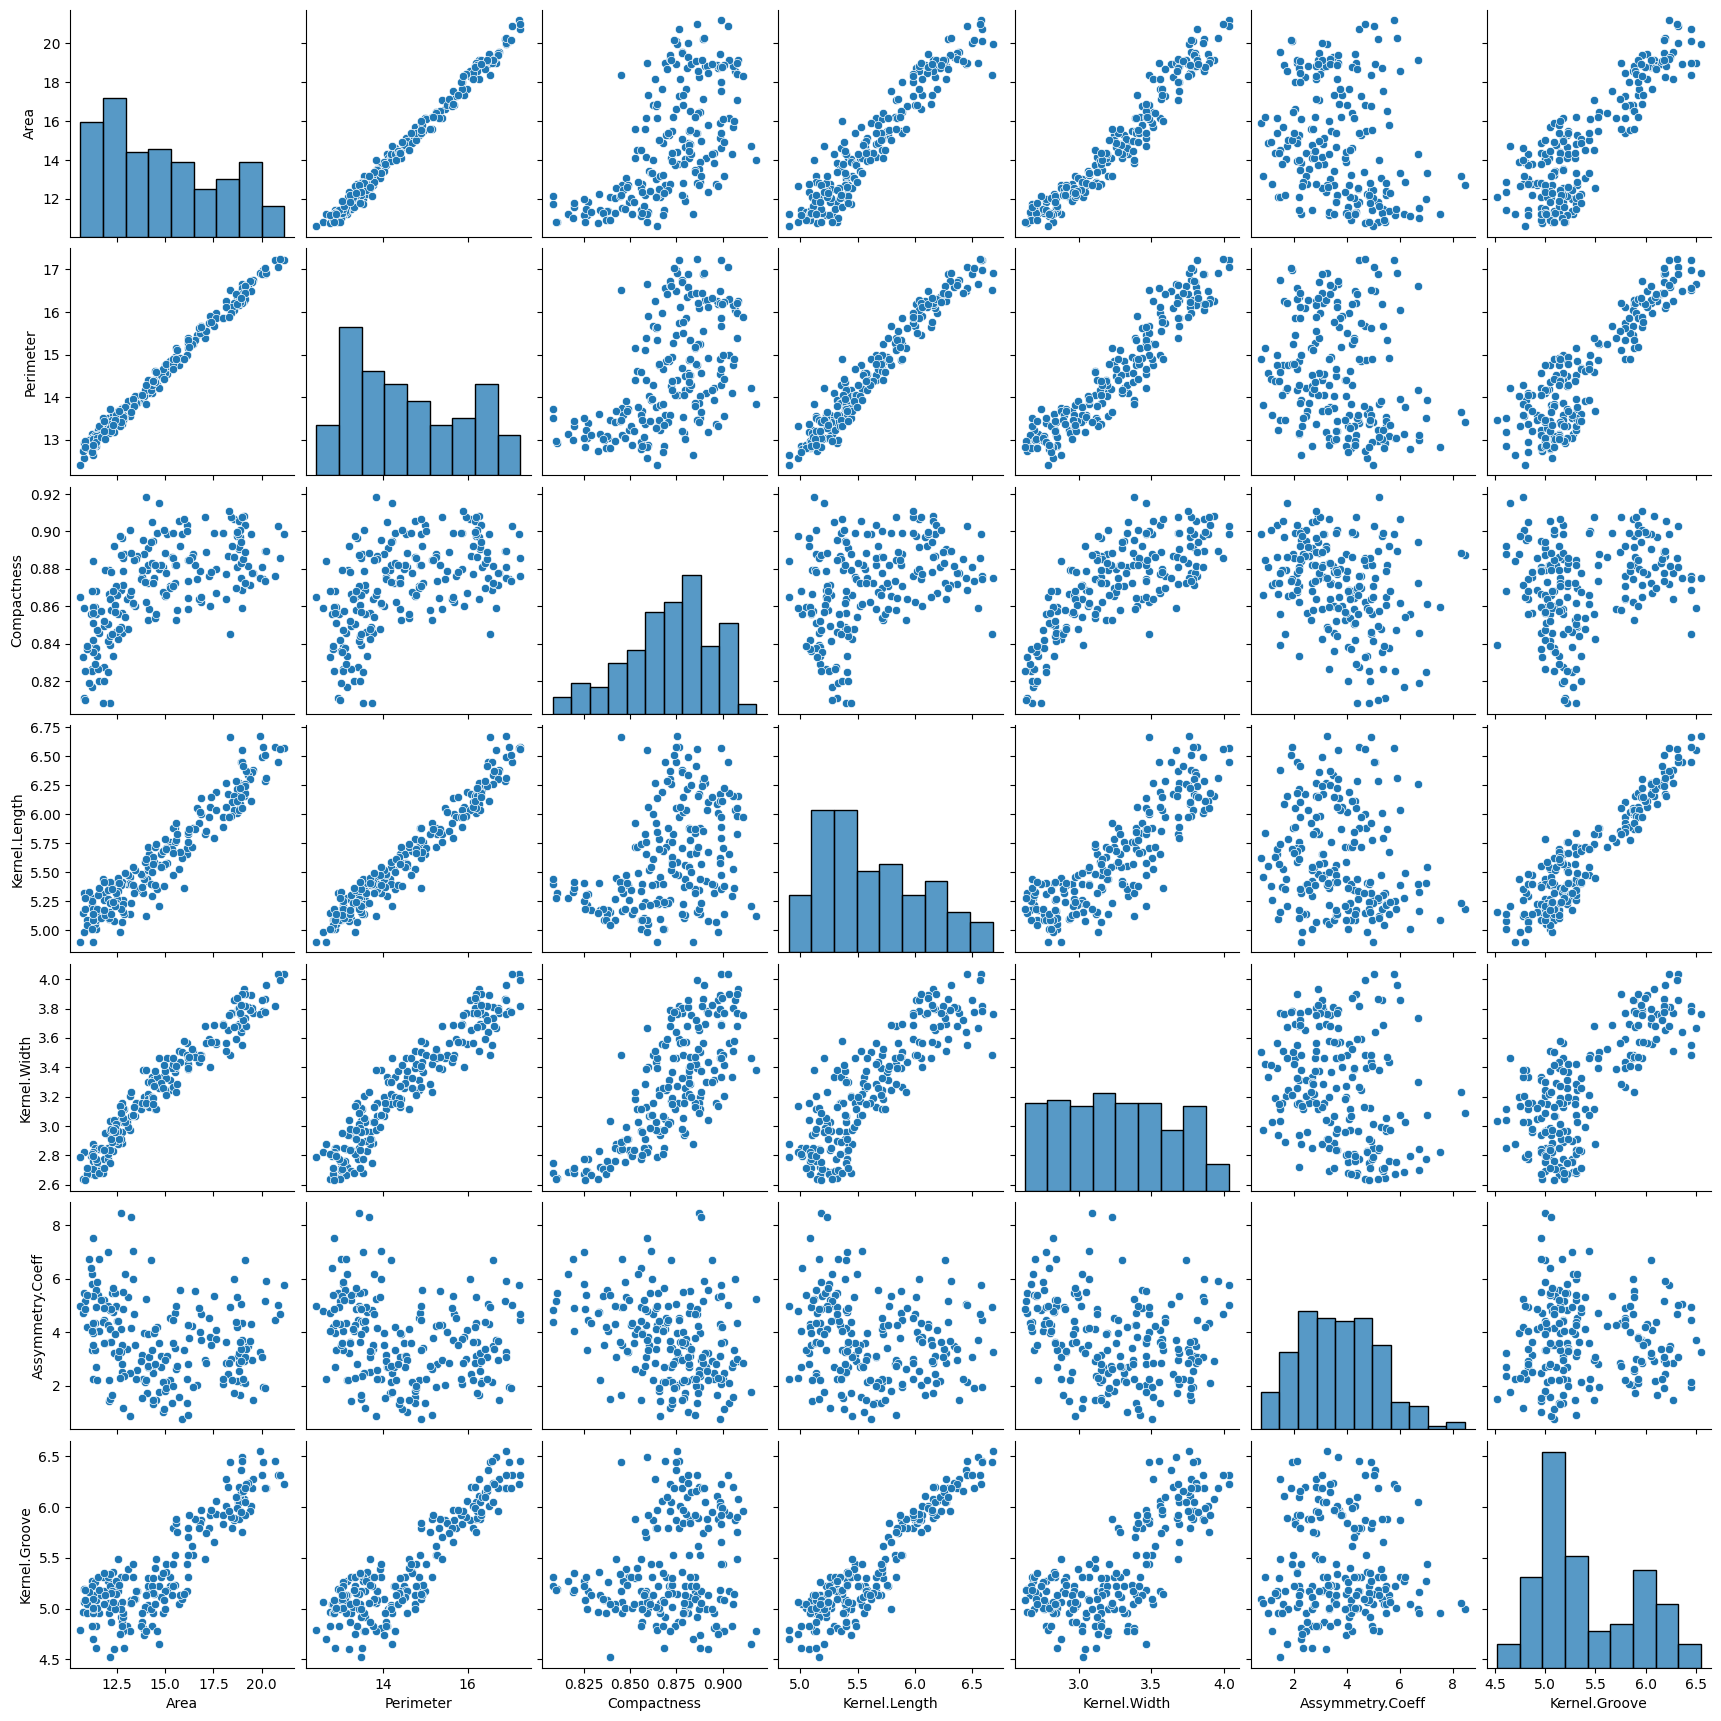

In [ ]:
#Visualize the correlations between the features using scatterplots
sns.pairplot(wheat)


> * The most relevant features are 'Kernel.Groove', 'Kernel.Width', 'kernel.lenght', 'Perimeter', and 'Area' because they show the storngest positive correlation among themselves.

> * The features 'Assymetry.coeff' and 'Compactness' show the least feature correlation with the other kernel measurements.

* Since 'Assymetry.coeff' and 'Compactness' show the least feature correlation with the other kernel measurements.
* We will perform **Feature Selection** and keep the relevant features to influence the performance of the decision tree classififer.

In [ ]:
#Drop non relevant features
wheatUpdate = wheat.drop(columns = ['Assymmetry.Coeff','Compactness'])
wheatUpdate.head()

,Area,Perimeter,Kernel.Length,Kernel.Width,Kernel.Groove,Variety
0,15.26,14.84,5.763,3.312,5.220,Kama
1,14.88,14.57,5.554,3.333,4.956,Kama
2,14.29,14.09,5.291,3.337,4.825,Kama
3,13.84,13.94,5.324,3.379,4.805,Kama
4,16.14,14.99,5.658,3.562,5.175,Kama


* We will take a look at the distribution of the classes, so we can verify the balance of data between the classes. This way we can make adjustsments in the case that the classes are imbalanced so we can avoid bias towards the greater amount of wheat variety.

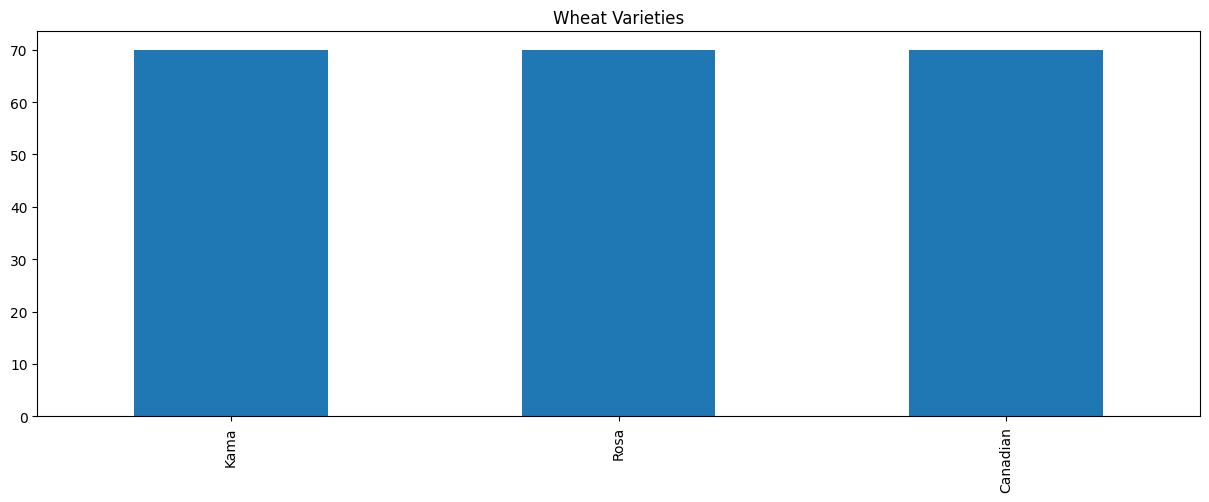

In [ ]:
#Bar graph of Wheat Varieties
wheatUpdate['Variety'].value_counts().plot(kind='bar', title='Wheat Varieties', figsize=(15,5))
plt.show()

* We can see that there is an even distribution of wheat variety: each variety is of the same amount in the dataset. So we are working we a balanced dataset, so we will not need to further work on the target attribute.

**Build Decision Tree Classifier**

In [ ]:
#Extracting input features and target variable
X = wheatUpdate.drop(columns = 'Variety')
y = wheatUpdate['Variety']

In [ ]:
# View the features
X.head()

,Area,Perimeter,Kernel.Length,Kernel.Width,Kernel.Groove
0,15.26,14.84,5.763,3.312,5.220
1,14.88,14.57,5.554,3.333,4.956
2,14.29,14.09,5.291,3.337,4.825
3,13.84,13.94,5.324,3.379,4.805
4,16.14,14.99,5.658,3.562,5.175


In [ ]:
#View the classes
y.head()

0    Kama
1    Kama
2    Kama
3    Kama
4    Kama
Name: Variety, dtype: object

In [ ]:
#Dividing the data into training and testing subsets using train_test_split method from sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 )

* We will use gini impurity for the decision tree.

In [ ]:
# Creating an object from DecisionTreeClassifier Class
decisionTree = DecisionTreeClassifier(criterion = 'gini')
## Calling the fit method to create a DT using training subset
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = decisionTree.predict(X_test)

* We will visualize the generated Decision Tree

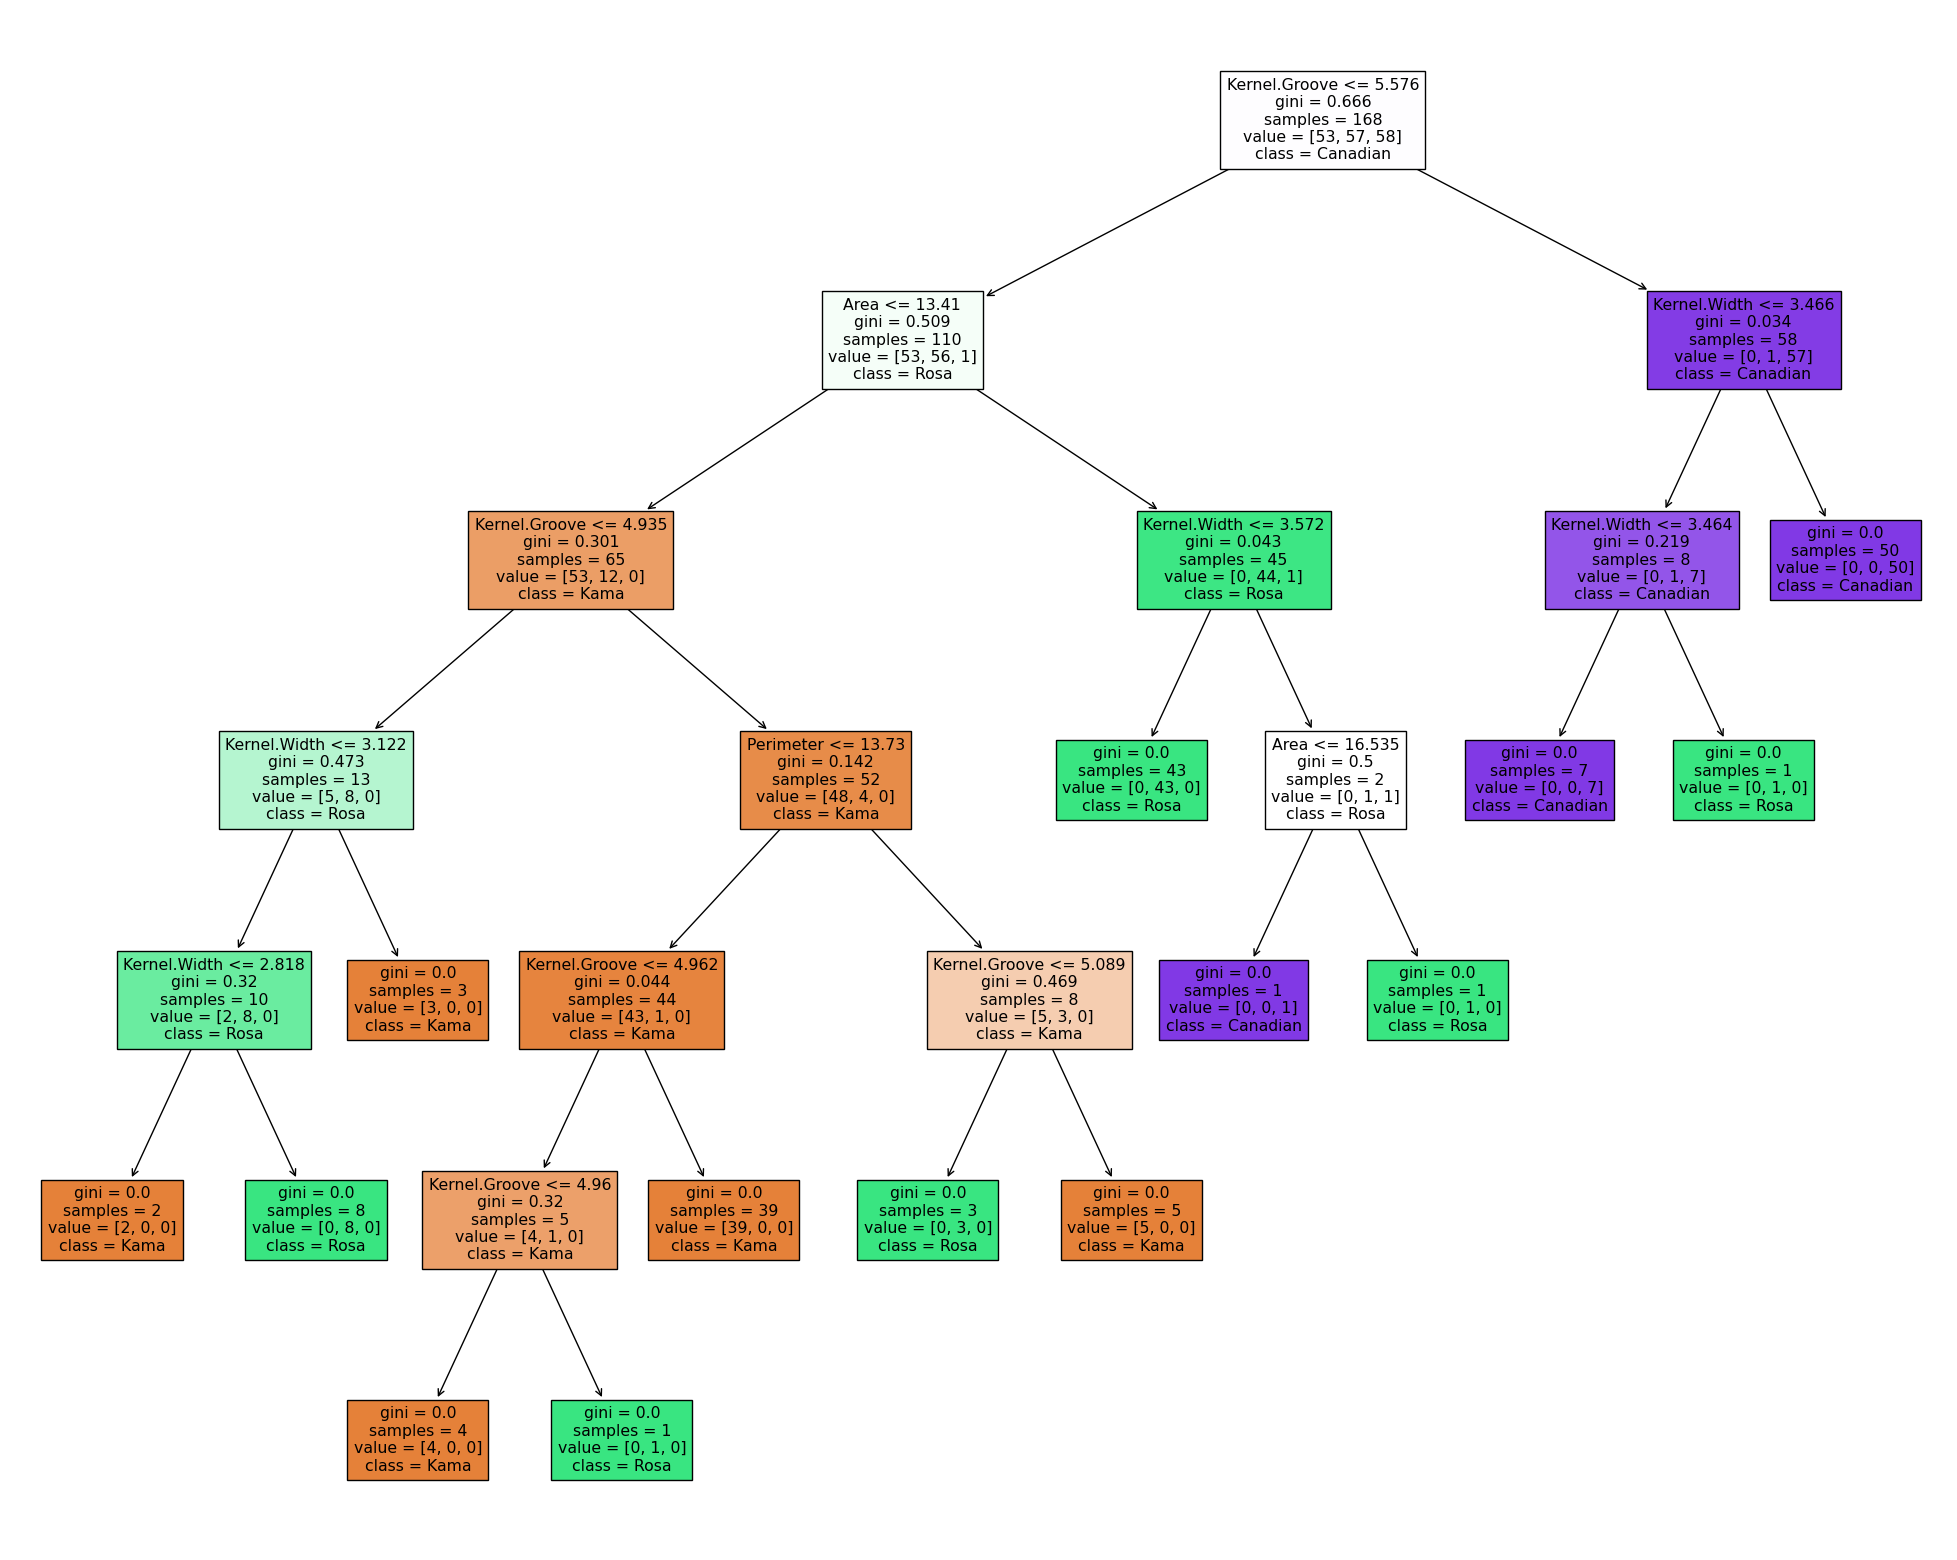

In [ ]:
fig = plt.figure(figsize = (25,20))
fig = tree.plot_tree(decisionTree, feature_names =['Area', 'Perimeter', 'Kernel.Length', 'Kernel.Width','Kernel.Groove'], class_names = ['Kama','Rosa', 'Canadian'], filled = True)

In [ ]:
# Looking at the performance of the trained model
train_accuracy = accuracy_score(y_train, decisionTree.predict(X_train))
train_precision = precision_score(y_train, decisionTree.predict(X_train), average = 'macro')
train_recall = recall_score(y_train, decisionTree.predict(X_train), average = 'macro')
train_confusionMatrix = confusion_matrix(y_train, decisionTree.predict(X_train))
train_f1Score = f1_score(y_train, decisionTree.predict(X_train), average = 'macro')

# Printing all the metrics
print("Train Accuracy: {:.2f}".format(train_accuracy))
print("Train Precision: {:.2f}".format(train_precision))
print("Train Recall: {:.2f}".format(train_recall))
print("Train F1-Score: {:.2f}".format(train_f1Score))
print("Train Confusion Matrix: \n",train_confusionMatrix)

Train Accuracy: 1.00
Train Precision: 1.00
Train Recall: 1.00
Train F1-Score: 1.00
Train Confusion Matrix: 
 [[53  0  0]
 [ 0 57  0]
 [ 0  0 58]]


**Evaluation of Training Model**
* The accuracy of the training model is 1.00. This indicates that the training model correctly predicted each class based on the features.
* The Precision indicates that the model is able to avoid fasle positives.
* The Reacell indicates that the model is able to classify all postive instances without missing any: i.e. the model is able to identify all classes correctly.
* The F1-score indicates good overall performance of the model.
* The confusion matrix indicates that the model correctly identifies all classes in the trained model.

In [ ]:
# Looking at the performance of the testmodel
test_accuracy = accuracy_score(y_test, predictions)
test_precision = precision_score(y_test, predictions, average = 'macro')
test_recall = recall_score(y_test, predictions, average = 'macro')
test_confusionMatrix = confusion_matrix(y_test, predictions)
test_f1Score = f1_score(y_test, predictions, average = 'macro')


# Printing all the metrics
print("Test Accuracy: {:.2f}".format(test_accuracy))
print("Test Precision: {:.2f}".format(test_precision))
print("Test Recall: {:.2f}".format(test_recall))
print("Test F1-Score: {:.2f}".format(test_f1Score))
print("Test Confusion Matrix: \n",test_confusionMatrix)


Test Accuracy: 0.93
Test Precision: 0.93
Test Recall: 0.93
Test F1-Score: 0.93
Test Confusion Matrix: 
 [[16  1  0]
 [ 1 12  0]
 [ 0  1 11]]


**Evaluation of Testing Model**
* The model has accuracy 0.93, this indicates that the model did not correctly classify all the instances in the dataset however, it is effective in the identification of the wheat varieties.
* The precicison indicates that the model has a high precision and makes fewer false positive prediction: i.e. does not always miss classifies wheat varities.
* The recall indicates that the model captures most of the positive intances: i.e. has low rate of False Negative identification, it does not always miss wheat variety classification.
* The F1-score indicates that the model has good precision and recall: the model is able to classify a good portion of the wheat varieties correctly and does not always miss falsely classify the wheat varieties.
* The confusion diagonal indicates that 46 out of the 49 samples were correctly identified with to their actual wheat varieties by the model.

> * The 0 in (1,3) indicates that model does not confuse Canadian with Kama. The 0 in (2,3), indicates that model does not confuse Canadian with Rosa and the 0 in (3,1) indicates that the model does not miss classify Kama with Canadian.

> * The 1 in (1,2) indicates that the model missclassified Rosa with Kama, the 1 in (2,1) indicates that the model misclassified Kama with Rosa, and  the 1 in (3,2) indicates that the model misclassified Rosa with Canadian.

**Conclusion of the Gini Decision Tree Classifier**
* The performance of the model decreased by 7% during the testing. This indicates that the model overfitted during the training and thus when tested with unknown/untrained features it could not map patterns of the dimensions to the kernel to the accurate wheat variety.
* The classification results of the tested model show that the model does not understand Rosa and Kama: the built model did not map strong patterns between the kernel dimensions and Rose, Kama.
* The goal is to form a very effective decision tree model, given that the model shows a strong mapping between the kernel dimensions and Canadian wheat variety, we would improve the performance by building another model with specific parameters.

**Information Dichotomiser 3**
* From the evaluation of the decision tree classifier above, we will build another model using the ID3 Algorithm and evaluate the performance. The aim is to improve and build a better-performing model with an accuracy of > 0.90 since we have balanced class data and strong positive correlations between the selected features and the classes.

In [ ]:
#Extracting input features and target variable
X = wheatUpdate.drop(columns = 'Variety')
y = wheatUpdate['Variety']

In [ ]:
#Dividing the data into training and testing subsets using train_test_split method from sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 )

* We will use ID3 for the decision tree and specify the depth of the tree.

In [ ]:
# Creating an object from DecisionTreeClassifier Class
decisionTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
## Calling the fit method to create a DT using training subset
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
predictions = decisionTree.predict(X_test)

* We will visualize the generated Decision Tree

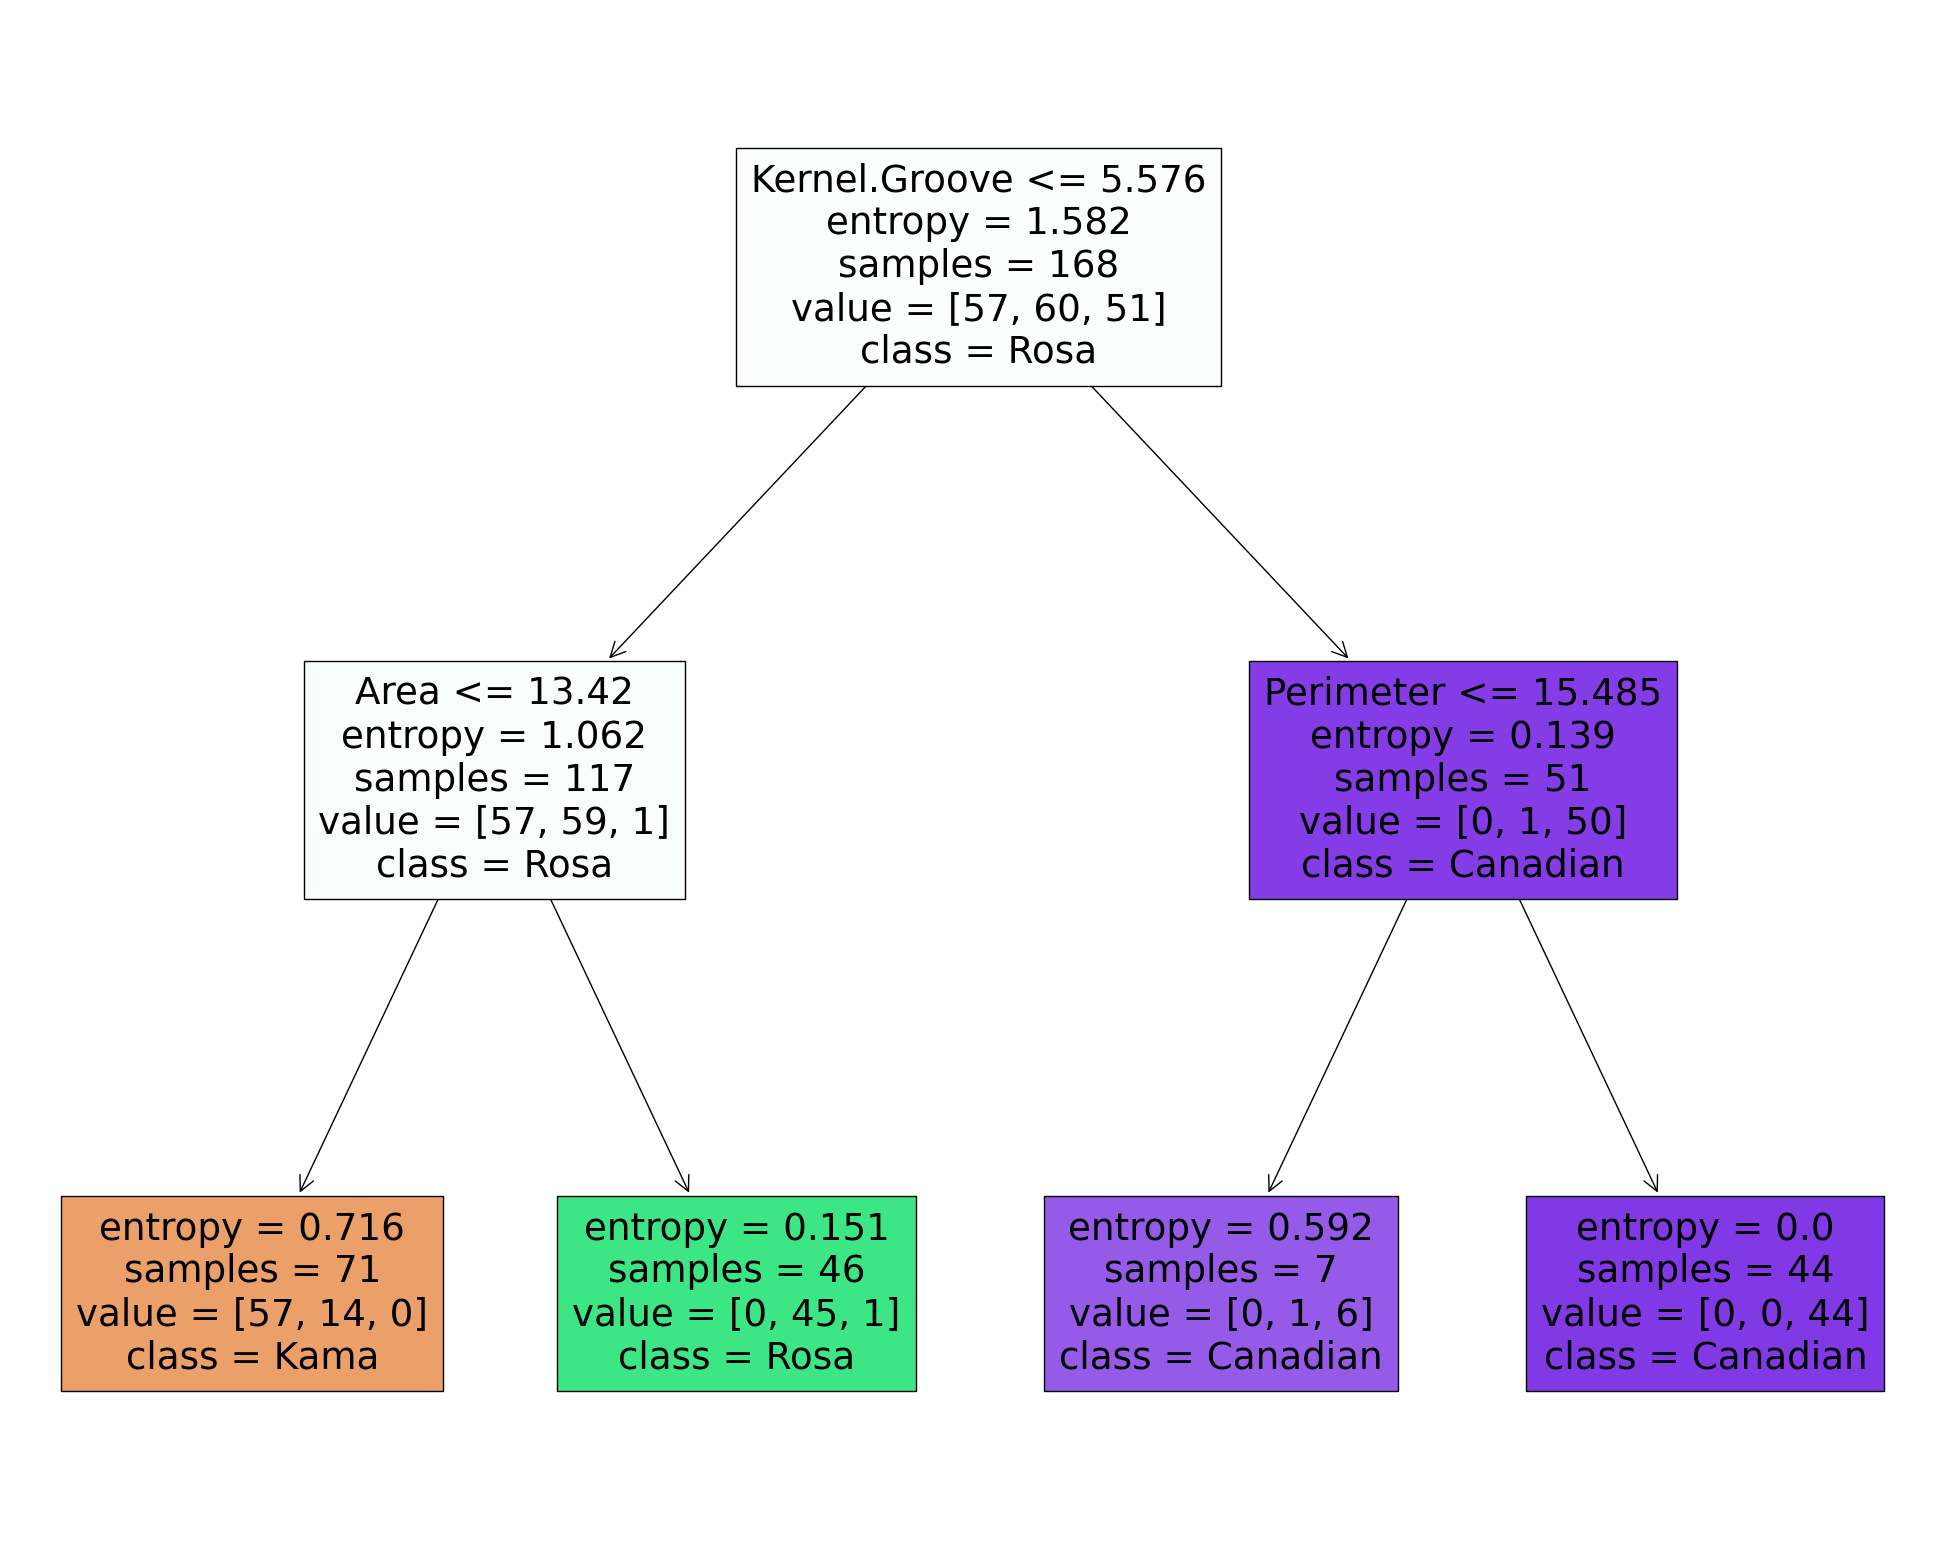

In [ ]:
fig = plt.figure(figsize = (25,20))
fig = tree.plot_tree(decisionTree, feature_names =['Area', 'Perimeter', 'Kernel.Length', 'Kernel.Width','Kernel.Groove'], class_names = ['Kama','Rosa', 'Canadian'], filled = True)

In [ ]:
# Looking at the performance of the trained model
train_accuracy = accuracy_score(y_train, decisionTree.predict(X_train))
train_precision = precision_score(y_train, decisionTree.predict(X_train), average = 'macro')
train_recall = recall_score(y_train, decisionTree.predict(X_train), average = 'macro')
train_confusionMatrix = confusion_matrix(y_train, decisionTree.predict(X_train))
train_f1Score = f1_score(y_train, decisionTree.predict(X_train), average = 'macro')

# Printing all the metrics
print("Train Accuracy: {:.2f}".format(train_accuracy))
print("Train Precision: {:.2f}".format(train_precision))
print("Train Recall: {:.2f}".format(train_recall))
print("Train F1-Score: {:.2f}".format(train_f1Score))
print("Train Confusion Matrix: \n",train_confusionMatrix)

Train Accuracy: 0.90
Train Precision: 0.92
Train Recall: 0.91
Train F1-Score: 0.91
Train Confusion Matrix: 
 [[57  0  0]
 [14 45  1]
 [ 0  1 50]]


**Evaluation of Training Model**
* The model has accuracy 0.90, this indicates that the model did not correctly classify all the instances in the dataset however, it is effective in the identification of the wheat varieties.
* The precicison indicates that the model has a high precision and makes fewer false positive prediction: i.e. does not always miss classify wheat varities.
* The recall indicates that the model captures most of the positive intances: i.e. has a low rate of False Negative identification, it does not always misclassify wheat varieties.
* The F1-score indicates that the model has good precision and recall: the model can predict majorty of the instances with the correct wheat variety.
* The confusion diagonal indicates that 152 out of the 168 samples were correctly identified with their actual wheat variety by the model.

> * The 0 in (1,3) indicates that model does not confuse Canadian with Kama. The 0 in (1,2), indicates that model does not confuse Rosa with Kama and the 0 in (3,1) indicates that the model does not miss classify Kama with Canadian.

> * The 1 in (2,3) indicates that the model missclassified Canadian with Rosa, the 14 in (2,1) indicates that the model misclassified Kama with Rosa, and  the 1 in (3,2) indicates that the model misclassified Rosa with Canadian.


In [ ]:
# Looking at the performance of the tested model
test_accuracy = accuracy_score(y_test, predictions)
test_precision = precision_score(y_test, predictions, average = 'macro')
test_recall = recall_score(y_test, predictions, average = 'macro')
test_confusionMatrix = confusion_matrix(y_test, predictions)
test_f1Score = f1_score(y_test, predictions, average = 'macro')


# Printing all the metrics
print("Test Accuracy: {:.2f}".format(test_accuracy))
print("Test Precision: {:.2f}".format(test_precision))
print("Test Recall: {:.2f}".format(test_recall))
print("Test F1-Score: {:.2f}".format(test_f1Score))
print("Test Confusion Matrix: \n",test_confusionMatrix)


Test Accuracy: 0.98
Test Precision: 0.97
Test Recall: 0.98
Test F1-Score: 0.98
Test Confusion Matrix: 
 [[13  0  0]
 [ 0 10  0]
 [ 0  1 18]]


**Evaluation of Testing Model**
* The model has an accuracy of 0.98, this indicates that the model correctly classified almost all of the instances in the dataset, it is very effective in the identification of the wheat varieties.
* The precision indicates that the model has a high precision and rarely makes false positive predictions: i.e. rarely miss classifies the wheat varieties.
* The recall indicates that the model captures most of the positive instances: i.e. has a very low rate of False Negative identification, it almost always correctly predicts all instances of the wheat varieties.
* The F1-score indicates that the model has great precision and recall: the model is able to classify almost all of the wheat varieties correctly.
* The confusion diagonal indicates that 41 out of the 42 samples were correctly identified with to their actual wheat varieties by the model.

> * The 0 in (2,3) and (3,3) indicate that model does not confuse Kama aany other variety. The 0 in (1,3) and (2,3), indicate that model does not confuse Canadian with any of the wheat varieties. And the 0 in (3,1) indicates that the model does not miss classify Kama with Canadian.

> * The 1 in (3,2) indicates that the model missclassified Rosa with Canadian.


**Conclusion of the entropy Decision Tree Classifier with max depth = 2**
* The model is very effective in predicting wheat varieties. It has a high precision - rarely misclassifies wheat varieties during predictions and is highly sensitive - correctly classifies all instances during prediction.

* This model faults misclassifying Rosa with Canadian but it is a better predicting model of the wheat varieties than the initial model built using Gini impurity.

# Project B: Effects of Joke on Tipping

* We will build a decision tree based classifier to determine whether a server will receive a tip from the customer from based on the predictor variables using the tipjoke.csv dataset.

In [ ]:
#Import the Dataset
receiveTip = pd.read_csv('/content/drive/MyDrive/CSC340/tipjoke.csv')

**Exploratory Data Analysis**

* We will begin to learn about the dataset we are working with.

* We will take a look at the dimensions so we can know the size.

In [ ]:
#Dimensions of the Dataset
receiveTip.shape

(211, 5)

* There are 211 rows and 5 columns in the dataset.

In [ ]:
#View the first 10 rows of the Dataset
receiveTip.head(10)

,Card,Tip,Ad,Joke,None
0,None,1,0,0,1
1,Joke,1,0,1,0
2,Ad,0,1,0,0
3,None,0,0,0,1
4,None,1,0,0,1
5,None,0,0,0,1
6,Ad,0,1,0,0
7,Ad,0,1,0,0
8,None,0,0,0,1
9,None,0,0,0,1


* Background Information: The dataset contains the following features: 'Card' {type of card used: Ad, Joke, or None}, 'Tip', 'Ad', 'Joke', 'None'.

* We are to answer : Can telling a joke affect whether or not a server in a coffee bar receives a tip from a customer?

> * We can see that 'Tip' is the target attribute.

> * From the information gathered, the type of card used is either an Ad, Joke, or None. Thus we see that the Card attribute is redundant since the information of the card is reflected on the other features.

> * The data appears to be binary values in each column: 0's or 1's.

In [ ]:
#Data types per attribute
receiveTip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Card    211 non-null    object
 1   Tip     211 non-null    int64 
 2   Ad      211 non-null    int64 
 3   Joke    211 non-null    int64 
 4   None    211 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.4+ KB


* The dataset is fully populated, with no null values under the attributes.

> * Note: 'None' indicates that the server only offer the customer a bill and nothing else. So it is valuable information for algorithm because it is relevant data.

In [ ]:
#Summary Statistics of dataset
receiveTip.describe()

,Tip,Ad,Joke,None
count,211.000000,211.000000,211.000000,211.000000
mean,0.284360,0.350711,0.341232,0.308057
std,0.452182,0.478327,0.475251,0.462788
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


* The mean, 75%, max and std of all features are within the same range.

In [ ]:
#Remove "Card", redundant attribute
updated_receiveTip = receiveTip.drop(['Card'], axis = 1)
updated_receiveTip.head()

,Tip,Ad,Joke,None
0,1,0,0,1
1,1,0,1,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,1


* We will now check the presence of correlation between the features and the existence of correlation between the classes and the features.
* This is important since we are performing classification and the correlation will be helpful in determining how well the features contibute to the tip, since we are working to build a decision tree classifier, which relies on patterns and relationships between features and classes to make accurate predictions.

<ipython-input-18-932ecf3e6154>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = receiveTip.corr()


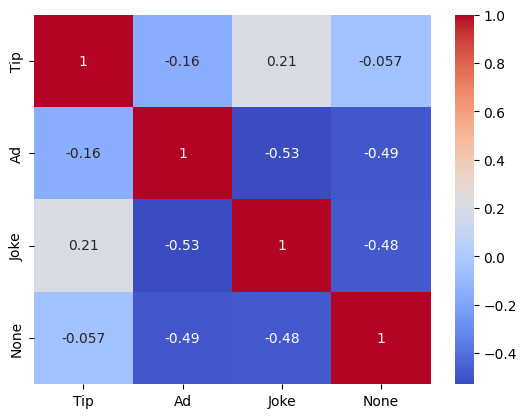

In [ ]:
#correlation plot
import seaborn as sns

corr_matrix = receiveTip.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

* The plot shows that the features are uncorrelated: this indicates that the variables in the dataset are not related to each other in any systematic way.

> * There are no strong correlations between the features and none of the features are correlated with the 'Tip', the 'Joke' attribute has a very weak positive correlation with 'Tip'.

> * Note: There are no strong correlations between the features and the classes so the patterns to build the decision tree are not strong or reliable. We would build the classifier, however, the performance of the model will not be good or favorable for the situation as the correletions are weak.

* We will visualize the features to identify any existing outliers.

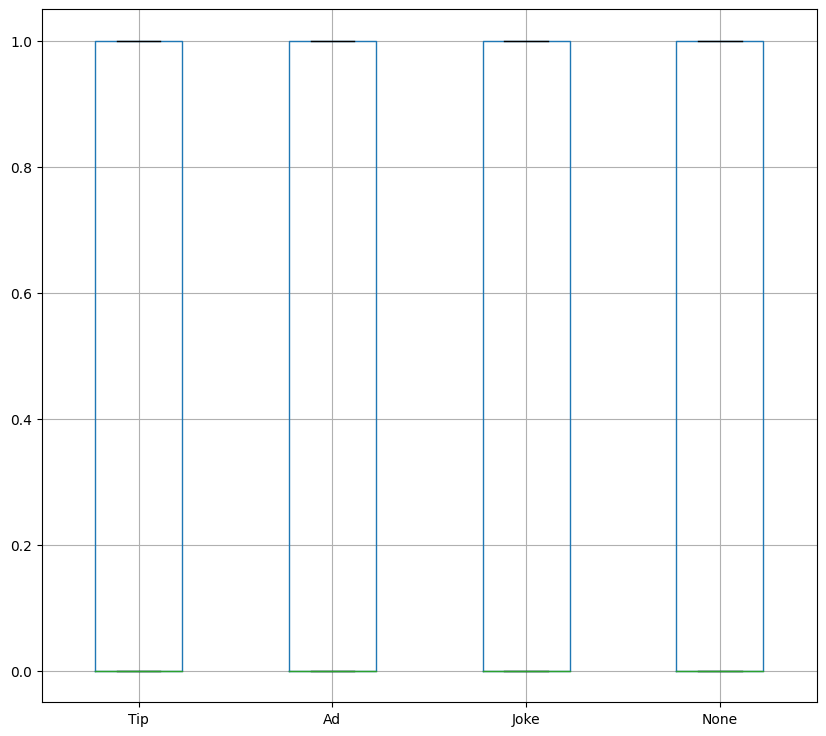

In [ ]:
#Boxplot of Ad, Joke, None
updated_receiveTip.boxplot(figsize=(10,9));

* There are no outliers in the  features of the dataset.

* Note: 'Tip', the target variable has two values 0: to represent that the server did not receive a tip and valies 1: represent the server received a tip.

* We will take a look at the distribution of 'Tip' counts of the dataset, to see the count of tipped servers and the count of non tipped servers.

In [ ]:
#Convert 'Tip' from numerical to categorical
updated_receiveTip["Tip"].replace({1 :"Yes" , 0 :"No" } , inplace = True)
updated_receiveTip.head()

,Tip,Ad,Joke,None
0,Yes,0,0,1
1,Yes,0,1,0
2,No,1,0,0
3,No,0,0,1
4,Yes,0,0,1


* We will take a look at the distribution of the classes, so we can verify the balance of data between the classes. This way we can make adjustsments in the case that the classes are imbalanced so we can avoid bias towards the greater class.

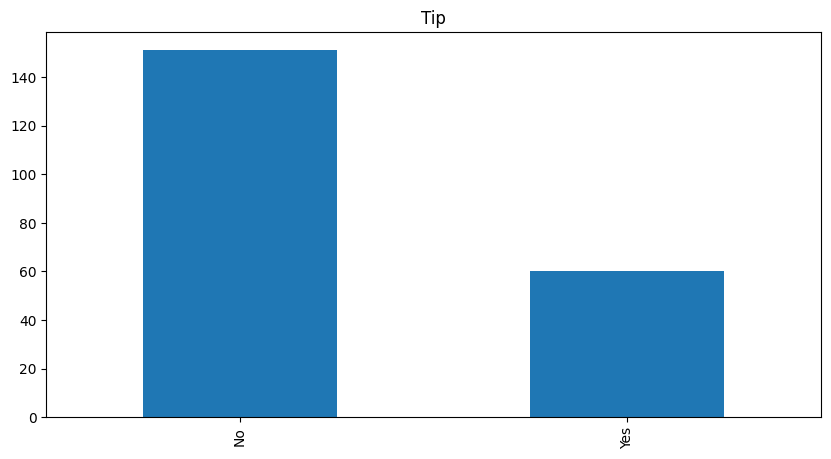

In [ ]:
updated_receiveTip['Tip'].value_counts().plot(kind='bar', title='Tip', figsize=(10,5))
plt.show()

* We can see that the tips is imbalanced, there are more 'No' than 'Yes' in the dataset for the target.
> * The class data is biased towards the 'No'.

**Build Decision Tree Classifier**

In [ ]:
#Extracting input features and target variable
X = updated_receiveTip.drop(columns = ['Tip'])
y = updated_receiveTip['Tip']

In [ ]:
#Dividing the data into training and testing subsets using train_test_split method from sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 )

* We will use gini impurity to select the best attribute for the decsion tree model.
* We will add < class_weight = 'balanced' > to because we are working with imbalanced class data proportions with a bias towards the 'No'; This will aid in bias reduction by adjusting the weights assigned to each class during the training of the model, by giving more weight to the minority class, 'Yes' and less weight ot the majority class 'No'.

In [ ]:
# Creating an object from DecisionTreeClassifier Class
decisionTree = DecisionTreeClassifier(criterion = 'gini', class_weight='balanced')
## Calling the fit method to create a DT using training subset
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
predictions = decisionTree.predict(X_test)

* Decision Tree Diagram

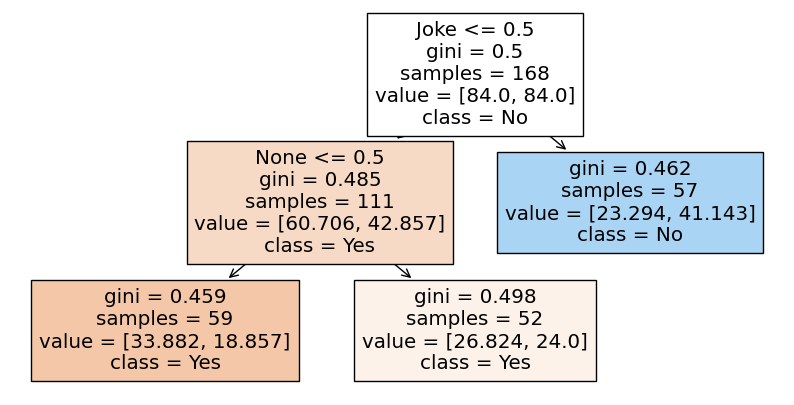

In [ ]:
fig = plt.figure(figsize = (10,5))
fig = tree.plot_tree(decisionTree, feature_names =['Ad', 'Joke', 'None'], class_names = ['Yes','No'], filled = True)

In [ ]:
# Looking at the performance of the trained model
train_accuracy = accuracy_score(y_train, decisionTree.predict(X_train))
train_precision = precision_score(y_train, decisionTree.predict(X_train), average = 'macro')
train_recall = recall_score(y_train, decisionTree.predict(X_train), average = 'macro')
train_confusionMatrix = confusion_matrix(y_train, decisionTree.predict(X_train))
train_f1Score = f1_score(y_train, decisionTree.predict(X_train), average = 'macro')

# Printing all the metrics
print("Train Accuracy: {:.2f}".format(train_accuracy))
print("Train Precision: {:.2f}".format(train_precision))
print("Train Recall: {:.2f}".format(train_recall))
print("Train F1-Score: {:.2f}".format(train_f1Score))
print("Train Confusion Matrix: \n",train_confusionMatrix)

Train Accuracy: 0.65
Train Precision: 0.60
Train Recall: 0.61
Train F1-Score: 0.60
Train Confusion Matrix: 
 [[86 33]
 [25 24]]


**Evaluation of Training Model**
* The model is accuracy 0.65, this indicates that the model correctly classified a little more than half of the instances in the dataset, it is ineffective in the identification of a received tip or not.
* The precicison indicates that the model has average precision and makes false positive predictions: i.e. in 40% of instances the model predicts 'Yes' when the actual instance is 'No' tip received.
* The recall indicates that the model captures the more than average of the positive intances: i.e. has high rate of False Negative identification, it mostly predicts 'No' when the classification is 'Yes'.
* The F1-score indicates that the model has mediocre precision and recall: the model is not able to currectly classify whether or not a server received a tip when handing the bill: for 40% of instances the model miss classifies the class.
* The confusion matrix diagonal indicates that 110 out of the 168 samples were correctly predicted as 'Yes' and 'No' by the model.

> * The 33 in (1,2) indicates that the model confused 33 'No' as 'Yes' and (2,1) indicate that model miss predicted 25 'Yes' as 'No'.


In [ ]:
# Looking at the performance of the trained model

test_accuracy = accuracy_score(y_test, predictions)
test_precision = precision_score(y_test, predictions, average = 'macro')
test_recall = recall_score(y_test, predictions, average = 'macro')
test_confusionMatrix = confusion_matrix(y_test, predictions)
test_f1Score = f1_score(y_test, predictions, average = 'macro')


# Printing all the metrics
print("Test Accuracy: {:.2f}".format(test_accuracy))
print("Test Precision: {:.2f}".format(test_precision))
print("Test Recall: {:.2f}".format(test_recall))
print("Test F1-Score: {:.2f}".format(test_f1Score))
print("Test Confusion Matrix: \n",test_confusionMatrix)

Test Accuracy: 0.67
Test Precision: 0.61
Test Recall: 0.63
Test F1-Score: 0.61
Test Confusion Matrix: 
 [[23  9]
 [ 5  6]]


**Evaluation of Testing Model**
* The model accuracy is 0.67, this indicates that the model correctly predicted 67% of the total number of instances in the dataset, it is not very effective in the identification of a received tip or not.
* The precicison indicates that the model has a little more than average precision and makes false positive predictions: i.e. in 39% of instances the model predicts 'Yes' when the actual instance is 'No' tip received.
* The recall indicates that the model captures more than average of the positive intances: i.e. predicted 63% if the positive instances 'Yes' correctly. In 37% of instances the model predicted 'No' when the classification is 'Yes'.
* The F1-score indicates that the model has little more than average precision and recall: the model is not able to correctly predict whether or not a server received a tip when handing the bill in 39% of the instances.
* The confusion matrix diagonal indicates that 29 out of the 43 samples were correctly predicted as 'Yes' and 'No' by the model.

> * The 9 in (1,2) indicates that the model confused 9 'No' as 'Yes' and (2,1) indicate that model miss classified 5 'Yes' as 'No'.


> **Conclusion Decision Tree Model**
The model performed 2% better during the testing than in the training.

* The model has an average performance and 67% of the total number of instances the model makes correct predictions of whether or not a server receives a Tip.
* The model has average sensitivity and precision: the model has an average tendency to correctly predict when the server receives a Tip and an average tendency to predict when the server did not receive a tip. This incicates that less than 40% of the predictions made by the model are false positive and and false negatives. However, the model has a +2% miss classification of 'Yes' as 'No'.
> * This could be because of the bias towards the 'No' class.

* With the performance results of the decision tree above, we do not have an effective predicting model, so it will be helpful to perform cross validation and evaluate the performanc eof that decision tree model to see if the performance will improve.
* We will build a decision tree model using Stratified Cross-Validation.

**Stratified Cross-Validation**

* It will help to verify the count of the class imbalance between the classes.

In [ ]:
#check count of 'Yes' and 'No' classes
tipCount = updated_receiveTip['Tip'].value_counts()
print(tipCount)

0    151
1     60
Name: Tip, dtype: int64


In [ ]:
# import library
from imblearn.under_sampling import RandomUnderSampler

# initialize the RandomUnderSampler
ros = RandomUnderSampler(random_state= 60)

# fit and transform the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# create the decision tree classifier
clf = DecisionTreeClassifier()

# fit the classifier to the resampled data
clf.fit(X_resampled, y_resampled)

# Make predictions on the resampled data
y_pred = clf.predict(X_resampled)

# Calculate accuracy
accuracy = accuracy_score(y_resampled, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_resampled, y_pred, average = 'micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_resampled, y_pred, average = 'micro')
print("Recall:", recall)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_resampled, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.625
Precision: 0.625
Recall: 0.625
Confusion Matrix:
 [[29 31]
 [14 46]]


**Evaluation of Model**
* The model accuracy is 0.625, this indicates that the model correctly predicted 62% of the instances in the dataset, it is not very effective in the identification of a received tip or not.
* The precicison indicates that the model has a little more than average precision and makes false positive predictions: i.e. in 37.5% of instances the model predicts 'Yes' when the actual instance is 'No' tip received.
* The recall indicates that the model captures more than average of the positive intances: i.e. has 62.5% rate of False Negative identification, in
 37.5% of instances it predicts 'No' when the classification is 'Yes'.
* The F1-score indicates that the model has little more than average precision and recall: the model is not able to classify whether or not a server received a tip when handing the bill in 37.5% of the instances.
* The confusion matrix diagonal indicates that 75 out of the 120 samples were correctly predicted as 'Yes' and 'No' by the model.

> * The 31 in (1,2) indicates that the model confused 31 'No' as 'Yes' and (2,1) indicate that model miss classified 14 'Yes' as 'No'.

**Conclusion of Stratified Cross-Validation Model**
Note that we have the same sensitivity and orecision with this model, though it is 5% less accurate than the initial gini decision tree model.
* Because precision and sensitivity are the same here, we can see that with this model we avioded 2% 'No' class bias of the initial gini model.
* Thus, this model is less biased towards the 'No' class.

**Conclusion**

All the decison tree classification models built have an accuracy level below 65%.
> * This is due to the weak correlations between the features and the classes,'Tip', that we noted in the correlation plot during the EDA and it is reflected on the performance of the stratified cross-validation model.
> * Additotnally, the classes have a bias towards the 'No': approximately 72% of the class values are 'No' and this is an imbalance in the class dataset.
>* In the case that we equalized the class data using stratified cross-validation the model did not show much improvement. This is due to the lack of correlation between the features and the class. Thus the decision tree could not use patterns to map the features to classes, because there are no existing correlations between Tip and Ad, Joke, None.

We are to answer the question: Can telling a joke affect whether or not a waiter in a coffee bar receives a tip from a customer?
* From the evaluation results of the performance of the decision tree model, telling a joke does not affect whether or not a server receives a tip.
> * This is because from the EDA, 'Joke' has a very weak correlation = 0.21 with 'Tip' and thus does not influence the receival of a tip by a server - there are no existing patterns that relate the Tip to a Joke.

In [ ]:
# Colab2PDF v1.0.4 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        !apt-get install librsvg2-bin
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  librsvg2-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,871 kB of archives.
After this operation, 6,019 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 librsvg2-bin amd64 2.52.5+dfsg-3ubuntu0.2 [1,871 kB]
Fetched 1,871 kB in 1s (1,253 kB/s)
Selecting previously unselected package librsvg2-bin.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../librsvg2-bin_2.52.5+dfsg-3ubuntu0.2_amd64.deb ...
Unpacking librsvg2-bin (2.52.5+dfsg-3ubuntu0.2) ...
Setting up librsvg2-bin (2.52.5+dfsg-3ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>